# Annual Messages to Congress on the State of the Union
Discription of Data (Wikipedia):
The State of the Union Address (sometimes abbreviated to SOTU) is an annual message delivered by the president of the United States to the U.S. Congress near the beginning of each calendar year on the current condition of the nation. The message typically includes reports on the nation's budget, economy, news, agenda, achievements and the president's priorities and legislative proposals.

## Load Data

Set the path of stored data into `PATH`, if you dont have any data, run `Download.ipynb`

In [1]:
# import libraries
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = 'SOTU_data' # path of stored data

Save Metadata into dicts/list/dataframes
- `file_date` -> map of file name: date of speach (e.g, '0.txt': '6-Jan-1945')
- `file_president` -> map of file name: president namae (e.g, '0.txt': 'Franklin D. Roosevelt')
- `date_list` list of all dates (just year) in order

In [3]:
file_date = {} # a dict to store file_name : date map
file_president = {} # a dict to store file_name: president_name
date_list = [] # date list in order

# open metadata information 
with open(PATH + '/information.csv', 'r') as c:
    csv_reader = csv.reader(c)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            # save to file_date dict 
            file_date[row[0]] = row[2]
            date_list.append(row[2].split(', ')[-1])            
            # save to file_president dict
            file_president[row[0]] = row[4]

Open stored txt files and save into a dict
- `file_document` -> map of file name: text of file
- `president_document` -> map of president name: concatenation of all texts related to that president 
- `corpus` -> concatenation of all texts

In [4]:
file_document = {} # a dict to store file_name : document text map
president_document = {} # a dict to store president_name: concatenation of documents text 

corpus :str = "" # a corpus of all texts


# building key and type of president_document dict
for president_name in set(file_president.values()):
    president_document[president_name] = ""

# store each content
for file_name in file_date.keys():
    with open(PATH + '/speaches/' + file_name) as f:
        content = ' '.join(f.read().splitlines())
    file_document[file_name] = content
    president_document[file_president[file_name]] = president_document[file_president[file_name]] + content
    corpus = corpus + content

### Text Sample

a text sample (1000 first characters) from `0.txt` file:

In [5]:
doc_sample = file_document['0.txt'][0:1000]
doc_sample 

' To the Congress: In considering the State of the Union, the war and the peace that is to follow are naturally uppermost in the minds of all of us. This war must be waged—it is being waged—with the greatest and most persistent intensity. Everything we are and have is at stake. Everything we are and have will be given. American men, fighting far from home, have already won victories which the world will never forget. We have no question of the ultimate victory. We have no question of the cost. Our losses will be heavy. We and our allies will go on fighting together to ultimate total victory. We have seen a year marked, on the whole, by substantial progress toward victory, even though the year ended with a setback for our arms, when the Germans launched a ferocious counter-attack into Luxembourg and Belgium with the obvious objective of cutting our line in the center. Our men have fought with indescribable and unforgettable gallantry under most difficult conditions, and our German enemi

a text sample (1000 first characters) from 'Donald J. Trump':

In [6]:
president_sample = president_document['Donald J. Trump'][0:1000]
president_sample

" The President. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans: Less than 1 year has passed since I first stood at this podium, in this majestic Chamber, to speak on behalf of the American people and to address their concerns, their hopes, and their dreams. That night, our new administration had already taken very swift action. A new tide of optimism was already sweeping across our land. Each day since, we have gone forward with a clear vision and a righteous mission: to make America great again for all Americans. Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We have endured floods and fires and storms. But through it all, we have seen the beauty of America's soul and the steel in America's spine. Each test has forged new American h

## Per-process Data

In [7]:
# import libraries
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import regexp_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from string import punctuation

### Tokenzier

In [8]:
# modified version of http://stackoverflow.com/questions/36353125/nltk-regular-expression-tokenizer
pattern = r'''(?x)          # set flag to allow verbose regexps
        (?:[a-zA-Z]\.)+(?:[a-zA-Z])?        # abbreviations, e.g. U.S.A. or u.s.a. or U.S or u.s
      | \w+(?:-\w+)*        # words with optional internal hyphens
      | \$?\d+(?:\.\d+)?%?\s?  # currency and percentages, e.g. $12.40, 82%
      | \.\.\.              # ellipsis
      | [][.,;"'?():_`-]    # these are separate tokens; includes ], [
    '''

pattern = re.compile(pattern)

# how to use
text_sample_token = ''
sample_tokenized = regexp_tokenize(text_sample_token, pattern)


def tokenizer(text):
    return regexp_tokenize(text, pattern)

sample of usage of `tokenizer`:

In [9]:
tokenizer('That U.S.A. poster-print the U.S costs $12.40')

['That', 'U.S.A.', 'poster-print', 'the', 'U.S', 'costs', '$12.40']

In [10]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatizer_costum(word, pos_tagger_lem=False):
    # if pos_tagger_lem=True the function becomes slow
    if pos_tagger_lem:
        return lemmatizer.lemmatize(word, get_wordnet_pos(word))
    else:
        return lemmatizer.lemmatize(word)

sample of usage of `lemmatizer_costum`:

In [11]:
print("Tokenized sentence: ")
sentence_sample = 'The striped bats are hanging on their feet for best and wrote you are'
print(tokenizer(sentence_sample))
print("POS Tagger is True: ")
print([lemmatizer_costum(word, pos_tagger_lem=True) for word in tokenizer(sentence_sample)])
print("POS Tagger is False: ")
print([lemmatizer_costum(word) for word in tokenizer(sentence_sample)])

Tokenized sentence: 
['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best', 'and', 'wrote', 'you', 'are']
POS Tagger is True: 
['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best', 'and', 'write', 'you', 'be']
POS Tagger is False: 
['The', 'striped', 'bat', 'are', 'hanging', 'on', 'their', 'foot', 'for', 'best', 'and', 'wrote', 'you', 'are']


### Cleaner

In [12]:
stop_words = stopwords.words('english')

def cleaner(text, lower=True, lemmatize=True, stop=True, pos_tagger_lem=False, punctuations=True, digits=True):
    # remove [Laughter] and [Applause]
    text = re.sub(r'(:?\[Laughter\]|\[Applause\])', '', text)
    if lower:
        text = text.lower()
        
    if stop:
        # filter stopwords
        text = " ".join([word for word in tokenizer(text) if word not in stop_words])
        
    if lemmatize:
        # lemmatize words: Returns the input word unchanged if it cannot be found in WordNet.
        text = " ".join([lemmatizer_costum(word, pos_tagger_lem) for word in tokenizer(text)])
    
    if digits:
        # remove digit+ word+: 2nd
        # remove digit+ : 22
        # remove digit+ word+ digit+: 2nd2
        text = re.sub(r'\b\d+\w*\d*\b', ' ', text)
    if punctuations:
        # remove punctuations
        text = ' '.join(word.strip(punctuation) for word in tokenizer(text))
        # remove leading trailing spaces
    text = text.strip()
    return text

sample of usage of `cleaner`:

In [13]:
# lower: True
# lemmatize: True, Pos Tagger: True
# stop words: True
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...', pos_tagger_lem=True)

'u.s.a write poster-print cost'

In [14]:
# lower: True
# lemmatize: True, Pos Tagger: False
# stop words: True
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...')

'u.s.a wrote poster-print cost'

In [15]:
# lower: False
# lemmatize: True, Pos Tagger: True
# stop words: True
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...', lower=False, pos_tagger_lem=True)

'That U.S.A write poster-print cost'

In [16]:
# lower: False
# lemmatize: True, Pos Tagger: False
# stop words: True
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...', lower=False)

'That U.S.A wrote poster-print cost'

In [17]:
# lower: False
# lemmatize: False, Pos Tagger: -
# stop words: True
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...', lower=False, lemmatize=False)

'That U.S.A wrote poster-print costs'

In [18]:
# lower: False
# lemmatize: False, Pos Tagger: -
# stop words: False
cleaner('That U.S.A. wrote [Laughter]poster-print are [Applause] costs $12.40...', lower=False, lemmatize=False, stop=False)

'That U.S.A wrote poster-print are costs'

### Apply pre_process 
- `file_normlized_doc` -> normalized version of file name: file text
- `president_normlized_doc` -> normalized version of president name: speaches of that president
- `normlized_doc` -> all normalized docs

Note: 
- the `cleaner` function is unexpectedly fast but if we pass `pos_tagger_lem=True` to `cleaner` function then it become slow.

In [19]:
file_normlized_doc = {} #normalized file: content
president_normlized_doc = {} # normalized president: content of corresponding president 
normlized_doc = [] # all normalized doc

# construct normalized file documents 
for key in file_document.keys():
    n_doc = cleaner(file_document[key])
    file_normlized_doc[key] = n_doc
    normlized_doc.append(n_doc)

# construct normalized president documents 
for key in president_document.keys():
    n_doc = cleaner(president_document[key])
    president_normlized_doc[key] = n_doc

## Process Data

In [21]:
# import libraries
import re
import numpy as np
import pandas as pd
import itertools
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pyLDAvis.sklearn, pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

### Word Freq Analysis
- First we tokenized speaches of each president and extract `NUMBER_OF_FREQ` of each president.

In [22]:
NUMBER_OF_FREQ = 50

In [23]:
president_tokenized_doc = {}

# tokenize president speaches
for president in president_normlized_doc.keys():
    president_tokenized_doc[president] = tokenizer(president_normlized_doc[president])
    
# create frequents 
president_dataframe = {}
for opt in president_tokenized_doc.keys():
     president_dataframe[opt] = FreqDist(president_tokenized_doc[opt]).most_common(NUMBER_OF_FREQ)

freq_analysis_word = pd.DataFrame(president_dataframe)
freq_analysis_word

,Dwight D. Eisenhower,Lyndon B. Johnson,Gerald R. Ford,Richard Nixon,Barack Obama,John F. Kennedy,Donald J. Trump,William J. Clinton,Jimmy Carter,George W. Bush,Franklin D. Roosevelt,Harry S. Truman,George Bush,Ronald Reagan
0,"(nation, 254)","(year, 197)","(year, 95)","(year, 589)","(american, 284)","(nation, 91)","(american, 162)","(year, 372)","(year, 791)","(america, 222)","(war, 75)","(world, 259)","(world, 77)","(year, 184)"
1,"(must, 252)","(must, 146)","(federal, 65)","(new, 443)","(year, 277)","(new, 78)","(year, 94)","(people, 299)","(program, 626)","(american, 179)","(must, 42)","(nation, 198)","(american, 72)","(america, 175)"
2,"(year, 241)","(nation, 145)","(american, 61)","(program, 420)","(job, 232)","(year, 73)","(america, 93)","(american, 298)","(congress, 522)","(people, 158)","(force, 33)","(must, 181)","(america, 61)","(u, 154)"
3,"(program, 227)","(american, 131)","(state, 60)","(federal, 399)","(america, 225)","(world, 71)","(thank, 82)","(must, 273)","(administration, 442)","(must, 150)","(peace, 31)","(people, 160)","(u, 56)","(american, 149)"
4,"(government, 207)","(congress, 119)","(new, 60)","(congress, 332)","(new, 196)","(must, 51)","(one, 66)","(child, 251)","(nation, 435)","(year, 142)","(people, 27)","(free, 159)","(must, 56)","(people, 132)"
5,"(world, 201)","(people, 108)","(world, 57)","(government, 329)","(people, 183)","(free, 47)","(people, 65)","(new, 232)","(new, 386)","(nation, 132)","(army, 26)","(year, 155)","(people, 52)","(government, 126)"
6,"(people, 189)","(new, 94)","(program, 57)","(state, 304)","(u, 166)","(program, 46)","(new, 65)","(america, 230)","(government, 381)","(world, 124)","(men, 23)","(congress, 113)","(know, 50)","(must, 126)"
7,"(federal, 169)","(u, 81)","(congress, 56)","(american, 287)","(work, 159)","(u, 43)","(country, 64)","(work, 209)","(federal, 379)","(u, 118)","(year, 23)","(economic, 110)","(new, 44)","(freedom, 94)"
8,"(state, 159)","(program, 77)","(must, 55)","(also, 282)","(make, 156)","(effort, 42)","(tonight, 60)","(u, 192)","(state, 371)","(country, 113)","(nation, 22)","(war, 109)","(one, 42)","(let, 89)"
9,"(congress, 157)","(world, 74)","(energy, 55)","(people, 253)","(let, 135)","(congress, 39)","(state, 55)","(every, 184)","(energy, 327)","(new, 108)","(need, 22)","(great, 108)","(time, 42)","(world, 88)"


### Key Phrases
Steps:
- normalize the corpus
- split the corpus into sentences

In [24]:
corpus_normlized = cleaner(corpus, lemmatize=False, stop=False, punctuations=False, digits=False)
sentences = sent_tokenize(corpus_normlized)
sentences = [cleaner(sen, lemmatize=False, stop=False) for sen in sentences]

example of 3 extracted sentences:

In [25]:
sentences[:3]

['to the congress  in considering the state of the union  the war and the peace that is to follow are naturally uppermost in the minds of all of us',
 'this war must be waged it is being waged with the greatest and most persistent intensity',
 'everything we are and have is at stake']

- `MIN_COUNT = 100`: Ignore all words and bigrams with total collected count lower than 100.

- `threshold (float)`: Represent a score threshold for forming the phrases (higher means fewer phrases). A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold. Heavily depends on concrete scoring-function scoring ('default', 'npmi').



In [26]:
MIN_COUNT = 100

In [27]:
sentence_stream = [tokenizer(sent) for sent in sentences]
phrase_model = Phrases(sentence_stream, min_count=MIN_COUNT, threshold=1.5, connector_words=ENGLISH_CONNECTOR_WORDS)

example of find phrases:

In [28]:
phrase_model['thank', 'you', 'state', 'of' , 'the', 'union', 'vice', 'president', 'mr', 'speaker']

['thank_you', 'state_of_the_union', 'vice', 'president', 'mr', 'speaker']

#### Extract Key Phrases from the all speaches:

In [29]:
def extrcat_phrases_all(model, min_count):
    phrase_dict_underline = {}
    for key in model.vocab.keys():
        if '_' in key:
            value =  model.vocab[key]
            
            # check number of min_count
            if int(value) > min_count:
                
                # extract phrases that the number of non-stop words are greater than 1
                list_key = key.split('_')
                len_key = len(list_key)
                list_key_exstop = [word for word in list_key if word not in stop_words]
                len_key_exstop = len(list_key_exstop)

                if len_key_exstop > 1:
                    phrase_dict_underline[key] = value
    
    # create a dataframe
    key_phrase_dataframe = {}
    key_phrase_dataframe["all"] = [(key, value) for key, value in phrase_dict_underline.items()]
    return pd.DataFrame(key_phrase_dataframe)


In [30]:
extrcat_phrases_all(phrase_model, MIN_COUNT)

,all
0,"(state_of_the_union, 113)"
1,"(soviet_union, 169)"
2,"(last_year, 421)"
3,"(men_and_women, 132)"
4,"(united_nations, 129)"
5,"(american_people, 291)"
6,"(united_states, 604)"
7,"(every_american, 105)"
8,"(let_us, 201)"
9,"(social_security, 188)"


#### and Key Phrases for each president:

In [33]:
def extract_key_phrases(dict_of_corpous, min_count):
    
    key_phrase_dataframe = {}
    for candidate in dict_of_corpous.keys():
        corpus_normlized = cleaner(dict_of_corpous[candidate], lemmatize=False, stop=False, punctuations=False, digits=False)
        sentences = sent_tokenize(corpus_normlized)
        sentences = [cleaner(sen, lemmatize=False, stop=False) for sen in sentences]
        sentence_stream = [tokenizer(sent) for sent in sentences]
        phrase_model = Phrases(sentence_stream, min_count=min_count, threshold=1.5, connector_words=ENGLISH_CONNECTOR_WORDS)
        
        phrase_dict_underline = {}
        for key in phrase_model.vocab.keys():
            if '_' in key:
                value =  phrase_model.vocab[key]
                
                # check number of min_count
                if int(value) > min_count:

                    # extract phrases that the number of non-stop words are greater than 1
                    list_key = key.split('_')
                    len_key = len(list_key)
                    list_key_exstop = [word for word in list_key if word not in stop_words]
                    len_key_exstop = len(list_key_exstop)

                    if len_key_exstop > 1:
                        phrase_dict_underline[key] = value

        # create a dataframe
        key_phrase_dataframe[candidate] = [(key, value) for key, value in phrase_dict_underline.items()]
        
    key_phrase_pd = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in key_phrase_dataframe.items() ]), dtype=pd.StringDtype())
    key_phrase_pd = key_phrase_pd.fillna('')
    return key_phrase_pd

In [34]:
MIN_COUNT = 20
freq_analysis_phrase = extract_key_phrases(president_document, MIN_COUNT)
freq_analysis_phrase

c:\users\ferodo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
c:\users\ferodo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
c:\users\ferodo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


,Dwight D. Eisenhower,Lyndon B. Johnson,Gerald R. Ford,Richard Nixon,Barack Obama,John F. Kennedy,Donald J. Trump,William J. Clinton,Jimmy Carter,George W. Bush,Franklin D. Roosevelt,Harry S. Truman,George Bush,Ronald Reagan
0,"('free_world', 47)","('last_year', 29)","('united_states', 22)","('state_of_the_union', 28)","('american_people', 39)",,"('united_states', 36)","('fellow_americans', 28)","('united_states', 184)","('members_of_congress', 23)",,"('united_states', 47)",,"('american_people', 24)"
1,"('united_states', 63)","('united_states', 22)",,"('years_ago', 54)","('clean_energy', 27)",,,"('american_people', 47)","('salt_ii', 21)","('fellow_citizens', 21)",,"('world_war', 30)",,"('federal_government', 23)"
2,"('united_nations', 31)",,,"('united_states', 82)","('new_jobs', 27)",,,"('let_us', 31)","('took_office', 23)","('united_states', 43)",,"('soviet_union', 25)",,"('let_us', 35)"
3,"('free_nations', 22)",,,"('last_year', 54)","('united_states', 36)",,,"('last_year', 63)","('federal_government', 76)","('men_and_women', 34)",,"('united_nations', 35)",,
4,"('federal_government', 43)",,,"('state_and_local', 85)","('states_of_america', 21)",,,"('vice_president', 23)","('natural_resources', 23)","('american_people', 24)",,"('free_nations', 46)",,
5,"('fiscal_year', 25)",,,"('american_people', 38)","('health_care', 29)",,,"('health_care', 53)","('private_sector', 51)","('al_qaida', 37)",,"('free_world', 43)",,
6,"('billion_dollars', 23)",,,"('federal_government', 88)","('make_sure', 31)",,,"('child_care', 24)","('last_year', 143)","('health_care', 27)",,,,
7,"('economic_growth', 23)",,,"('law_enforcement', 36)","('middle_class', 29)",,,"('health_insurance', 21)","('administration_and_the_congress', 21)","('social_security', 30)",,,,
8,"('last_year', 28)",,,"('let_us', 49)","('last_year', 30)",,,"('united_states', 25)","('health_care', 52)","('let_us', 23)",,,,
9,,,,"('health_care', 29)","('years_ago', 24)",,,"('years_ago', 28)","('two_years', 34)","('middle_east', 26)",,,,


### LDA 
LDA is a generative statistical model for topic modeling. LDA is based on term counts and document counts. 

- `ngram_range`=(1,2), means the lower bound is 1 and upper boundary is 2 from the range of values for different word n-grams.
- `min_df`= 4, removes words with occurrence in less than 4 documents.
- `max_df` = 0.6, ignores the terms that have a document frequency strictly higher than 0.6.
- `max_features`=1000, selects 1000 top features by the score of term frequencey.
- `n_components` = 3, chooses number of topics=3

In [35]:
number_of_topics = 3 #number of topics

In [36]:
# a function to compute count vectorizer and LDA
def lda_costum(docs, n_topics=3, ngram_range=(1,2)):
    c_vectorizer_model = CountVectorizer(analyzer='word', ngram_range=ngram_range, tokenizer=tokenizer , max_df=0.6, min_df=5, max_features=1000)
    cv_fit = c_vectorizer_model.fit_transform(docs)
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=100, n_jobs=-1)
    lda_model.fit(cv_fit)
    return lda_model, cv_fit, c_vectorizer_model
    
# a function to give words of each topic for LDA: number_show can be cahnged
def lda_display(lda_model, c_vectorizer_model):
    names = c_vectorizer_model.get_feature_names()
    number_show = 10
    for ind, topic in enumerate(lda_model.components_):
        topic_list = [names[i] for i in np.argsort(topic * -1)[:number_show]]
        print(f"Topic {ind}: {topic_list}")

# a function to plot the topics during the time
def costum_plot(model, model_fit, n_words = 30):
    
    time_series = []
    n_words = 30
    for index in range(number_of_topics):
        top_number_indices = np.argsort(model.components_ * -1)[index,:n_words]
        values = model_fit[:,top_number_indices].transpose().sum(axis=0)
        time_series.append(values)
        
    concatenate_values = np.concatenate(tuple(time_series))
    normlized_values = normalize(concatenate_values, norm='l1', axis=0)
    
    index_list = [f'Topic {ind}' for ind in range(number_of_topics)]
    df = pd.DataFrame(data=normlized_values.T, index=date_list, columns=index_list)

    plot = sns.lineplot(data=df)
    plt.setp(plot.get_xticklabels(), rotation=90)

Apply `lda_costum` function to compute topics and display the top 10 words in each topic using `lda_display` function.

In [37]:
lda_model, cv_fit, c_vectorizer_model = lda_costum(normlized_doc, n_topics=number_of_topics)
lda_display(lda_model, c_vectorizer_model)

Topic 0: ['proposed', 'oil', 'agency', 'employment', 'rural', 'state local', 'transportation', 'u.s', 'ensure', 'management']
Topic 1: ['shall', 'communist', 'labor', 'recommend', 'free world', 'recommendation', 'expenditure', 'united nation', 'fiscal', 'aggression']
Topic 2: ['tonight', 'thank', 'terrorist', 'parent', 'college', 'pas', 'drug', 'health care', 'iraq', 'dream']


Apply `costum_plot` function to see how much each topic is spoken during the time, we consider top 30 words from each topic

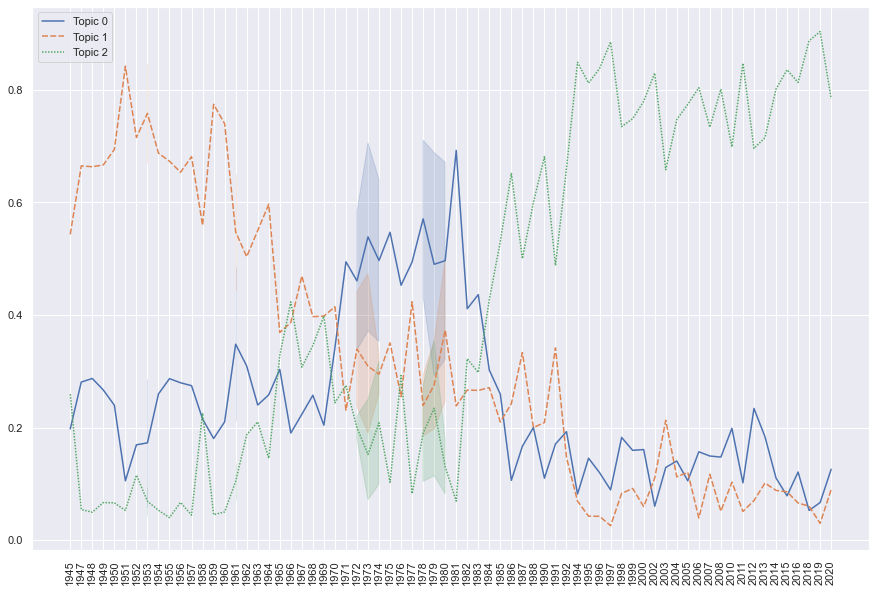

In [38]:
costum_plot(lda_model, cv_fit, 30)

Use `pyLDAvis` to plot Intertopic Distance Map of Topics and Top-30 Most Relevant Terms for each topic 

In [39]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, cv_fit, c_vectorizer_model)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.071458  0.072551       1        1  38.248259
2      0.145435 -0.000833       2        1  34.891004
1     -0.073978 -0.071718       3        1  26.860737, topic_info=          Term        Freq       Total Category  logprob  loglift
907    tonight  510.000000  510.000000  Default  30.0000  30.0000
796      shall  315.000000  315.000000  Default  29.0000  29.0000
890      thank  213.000000  213.000000  Default  28.0000  28.0000
143  communist  162.000000  162.000000  Default  27.0000  27.0000
888  terrorist  153.000000  153.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
104      carry   59.576634  115.453126   Topic3  -5.8303   0.6529
728   relation   64.432365  172.070069   Topic3  -5.7519   0.3322
422    however   62.867786  151.256720   Topic3  -5.7765   0.4366
868     supply   62.424075  180.937208   Topic3  -5.7836   0.2503
823      sound   61.478011  159.024456   Topic3  -5.7988   0.3641

[197 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
9         1  0.634956     activity
9         2  0.024658     activity
9         3  0.339054     activity
13        1  0.802485     addition
13        2  0.013836     addition
...     ...       ...          ...
990       2  0.019483  world peace
990       3  0.740335  world peace
991       1  0.195849    world war
991       2  0.184329    world war
991       3  0.622109    world war

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### NMF 
Non Matrix Factorization using Tf-idf
- `ngram_range`=(1,3), means the lower bound is 1 and upper boundary is 3 from the range of values for different word n-grams.
- `min_df`= 4, removes words with occurrence in less than 4 documents.
- `max_df` = 0.6, ignores the terms that have a document frequency strictly higher than 0.6.
- `max_features`=5000, selects 5000 top features by the score of term frequencey.
- `n_components` = 3, chooses number of topics=3

In [40]:
number_of_topics = 3 #number of topics

In [41]:
# a function to compute TFIDF and NMF
def nmf_costum(docs, n_topics=4):
    tf_vectorizer_model = TfidfVectorizer(analyzer='word', ngram_range=(1,3), token_pattern=pattern, max_df=0.6, min_df=5, max_features=5000)
    tf_fit = tf_vectorizer_model.fit_transform(docs)
    nmf_model = NMF(n_components=n_topics, init='nndsvd', alpha=0.1, l1_ratio=0.1, random_state=100).fit(tf_fit)

    return nmf_model, tf_fit, tf_vectorizer_model
    
# a function to give words of each topic for NMF: number_show can be cahnged
def nmf_display(nmf_model, tf_vectorizer_model):
    names = tf_vectorizer_model.get_feature_names()
    number_show = 10
    for ind, topic in enumerate(nmf_model.components_):
        topic_list = [names[i] for i in np.argsort(topic * -1)[:number_show]]
        print(f"Topic {ind}: {topic_list}")
        

Apply `nmf_costum` function to compute topics and display the top 10 words in each topic using `nmf_display` function.

In [42]:
nmf_model, tf_fit, tf_vectorizer_model = nmf_costum(normlized_doc, n_topics=number_of_topics)
nmf_display(nmf_model, tf_vectorizer_model)

Topic 0: ['shall', 'communist', 'free world', 'labor', 'recommend', 'expenditure', 'free nation', 'recommendation', 'united nation', 'aggression']
Topic 1: ['tonight', 'terrorist', 'thank', 'iraq', 'parent', 'college', 'pas', 'kid', 'company', 'iraqi']
Topic 2: ['oil', 'environmental', 'proposed', 'rural', 'state local', 'transportation', 'agency', 'employment', 'regulatory', 'urban']


Apply `costum_plot` function to see how much each topic is spoken during the time, we consider top 30 words from each topic

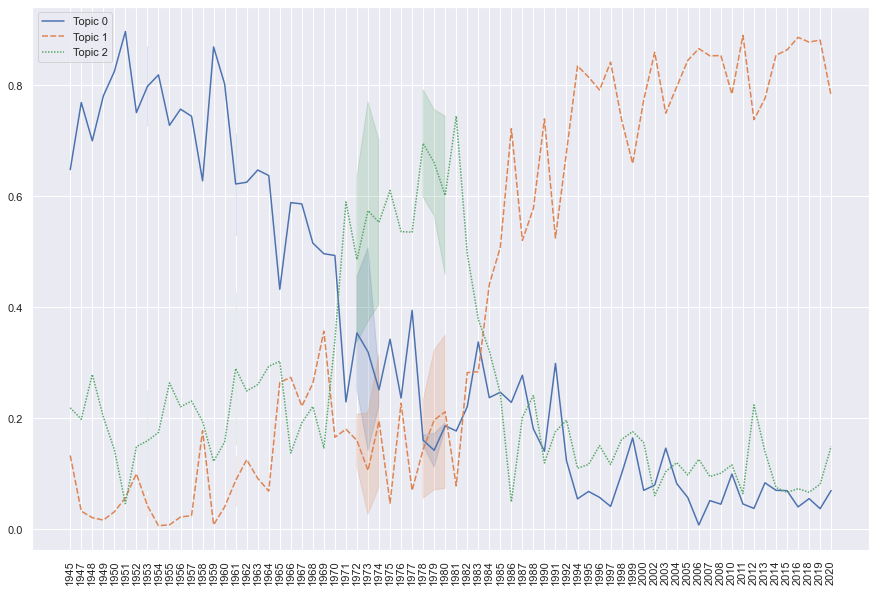

In [43]:
costum_plot(nmf_model, tf_fit, 30)

Use `pyLDAvis` to plot Intertopic Distance Map of Topics and Top-30 Most Relevant Terms for each topic 

In [44]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(nmf_model, tf_fit, tf_vectorizer_model)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.224434  0.040875       1        1  40.129481
0     -0.065877 -0.168912       2        1  34.891590
2     -0.158557  0.128037       3        1  24.978928, topic_info=             Term      Freq     Total Category  logprob  loglift
4020        shall  4.000000  4.000000  Default  30.0000  30.0000
4481      tonight  6.000000  6.000000  Default  29.0000  29.0000
740     communist  2.000000  2.000000  Default  28.0000  28.0000
4416    terrorist  2.000000  2.000000  Default  27.0000  27.0000
4422        thank  2.000000  2.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
2471  legislative  0.923630  1.471942   Topic3  -6.2985   0.9211
877      consumer  0.939804  1.570807   Topic3  -6.2812   0.8735
2882      natural  0.901830  1.609589   Topic3  -6.3224   0.8078
3481      propose  0.961976  2.659376   Topic3  -6.2578   0.3703
51       activity  0.892907  1.797535   Topic3  -6.3323   0.6874

[278 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
51        2  0.556317                 activity
51        3  0.556317                 activity
60        3  0.740447                 addition
66        2  0.660400                 adequate
75        3  1.928384  administration continue
...     ...       ...                      ...
4632      2  1.223544            united nation
4654      3  0.683566                    urban
4701      1  0.569961                  vietnam
4701      2  0.569961                  vietnam
4812      2  0.722367                    whole

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])